In [ ]:
#IMPORTA LIBRERIAS Y CARGA PAQUETES NECESARIOS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

In [4]:
#CARGA DATOS Y CREA ETIQUETAS PARA EL CALCULO DE ROC
data = load_iris()
X, y = data.data, data.target

y_binarized = label_binarize(y, classes=np.unique(y))

In [3]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test, y_train_bin, y_test_bin = train_test_split(
    X, y, y_binarized, test_size=0.2, random_state=42
)

In [4]:
#CREA, ENTRENA Y HACEMOS PREDICCIONES CON EL MODELO RANDOM FOREST
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)

In [9]:
#EVALUAMOS LAS MÉTRICAS DEL MODELO
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test_bin, y_pred_proba, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}\n")

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

#ANALISIS DE COMPONENTES PRINCIPALES (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#IMPORTANCIA DE LAS VARIABLES
importances = rf.feature_importances_
features = data.feature_names
df_importance = pd.DataFrame({
    'Variable': features,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

Accuracy: 1.0000
ROC-AUC: 1.0000

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



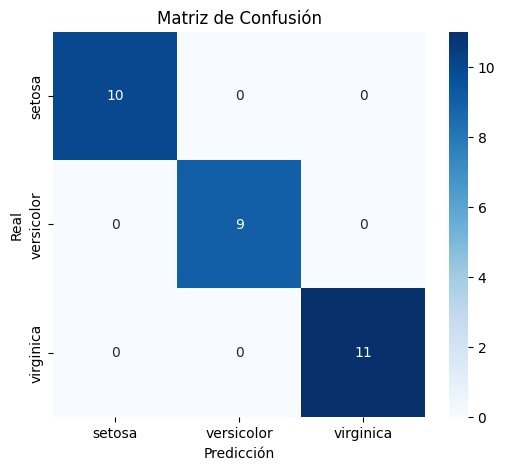

In [ ]:
# GRAFICO 1: MATRIZ DE CONFUSION
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d",
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


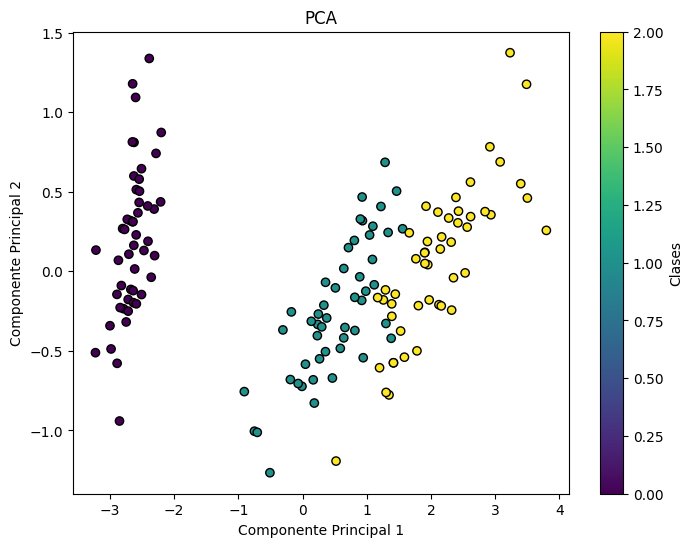

In [10]:
# GRAFICO 2: PCA (DISPERSION DE LOS DOS COMPONENTES PRINCIPALES)
plt.figure(figsize=(8, 6))
sc = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA")
plt.colorbar(sc, label="Clases")
plt.show()

C:\Users\dhurt\AppData\Local\Temp\ipykernel_2332\702478040.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=df_importance, palette='viridis')


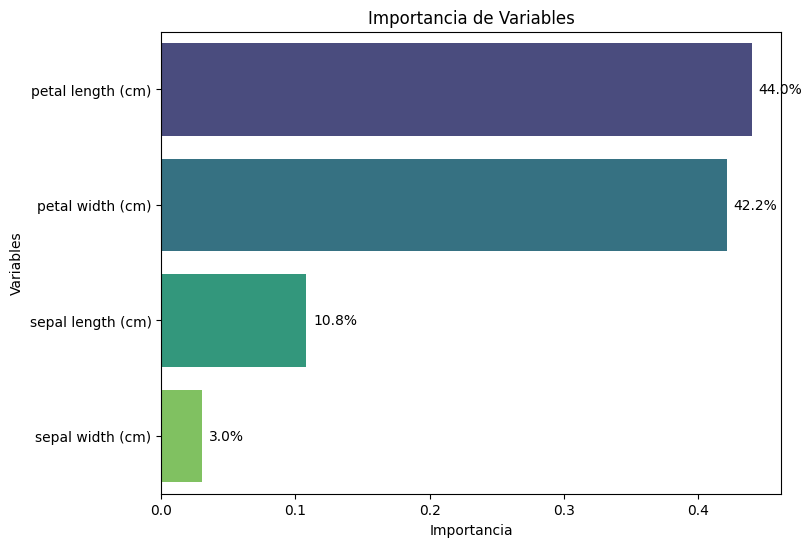

In [11]:
#GRAFICO 3: IMPORTANCIA DE LAS VARIABLES
plt.figure(figsize=(8, 6))
sns.barplot(x='Importancia', y='Variable', data=df_importance, palette='viridis')
plt.title("Importancia de Variables")
plt.xlabel("Importancia")
plt.ylabel("Variables")

#AGREGA % DE CADA BARRA
for i, v in enumerate(df_importance['Importancia']):
    plt.text(v + 0.005, i, f"{v*100:.1f}%", color='black', va='center')

plt.show()

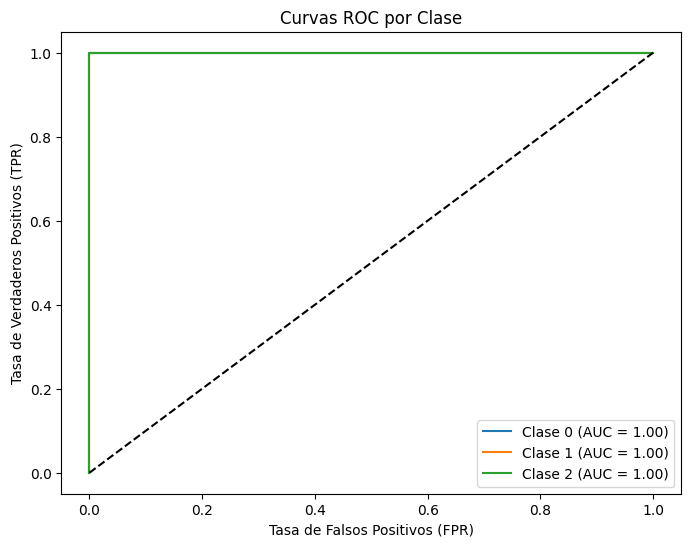

In [12]:
#GRAFICO 4: CURVA ROC
plt.figure(figsize=(8, 6))
for i in range(y_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Clase {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC por Clase')
plt.legend()
plt.show()